<p align="left">
  <img src="https://wp.ufc.br/assets/sitiomodelo/brasao-2.png" alt="Imagen1" width="50"/>
  <img src="https://mmq.ufc.br/wp-content/uploads/2019/04/mmq-logo-oficial.png" alt="Imagen2" width="160"/>
</p>

## **Universidade Federal do Ceará**
### **Mestrado em Modelagem e Métodos Quantitativos**
## **Carlos Gutiérrez**
---

In [2]:
import rasterio
import rasterio.plot
from rasterio.plot import show
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
#os.environ["PROJ_LIB"] = r"C:\Users\USUARIO\anaconda3\envs\igac\Library\share\proj"
import pyproj
import matplotlib.patches as mpatches

# Plot das ortoimagens por banda

In [3]:
'''
Definiendo a rota da biblioteca de proj
'''
import os
from pyproj import datadir

os.environ["PROJ_LIB"] = r"C:\Users\USUARIO\anaconda3\envs\igac\Library\share\proj"
datadir.set_data_dir(os.environ["PROJ_LIB"])

In [6]:
'''
Definindo as rotas
'''

raster_path = ('../pesquisa/data_raster_final/imagen_georref.tif')
#raster_path = ('../pesquisa/data_raster/tunja_clip_2.tif')
bogota_3 = rasterio.open(raster_path)
print(tunja_tif)

<open DatasetReader name='../pesquisa/data_raster_final/imagen_georref.tif' mode='r'>


In [7]:
'''
Conferindo o conteudo do dataset
'''

for key, value in tunja_tif.meta.items():
  print(f"{key}: {value}")

driver: GTiff
dtype: uint8
nodata: None
width: 2807
height: 2020
count: 3
crs: EPSG:4326
transform: | 0.00, 0.00,-74.09|
| 0.00,-0.00, 4.57|
| 0.00, 0.00, 1.00|


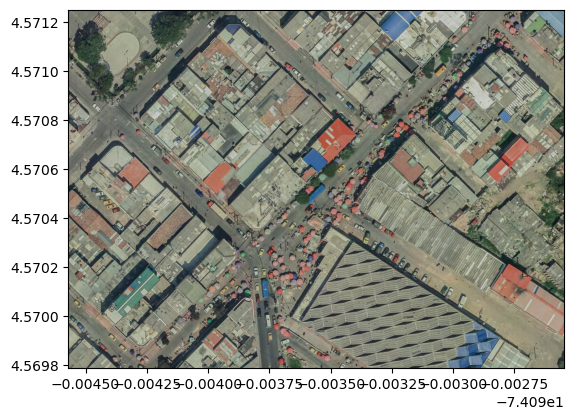

<Axes: >

In [9]:
'''
Conferindo a imagem carregada
'''

rasterio.plot.show(bogota_3)

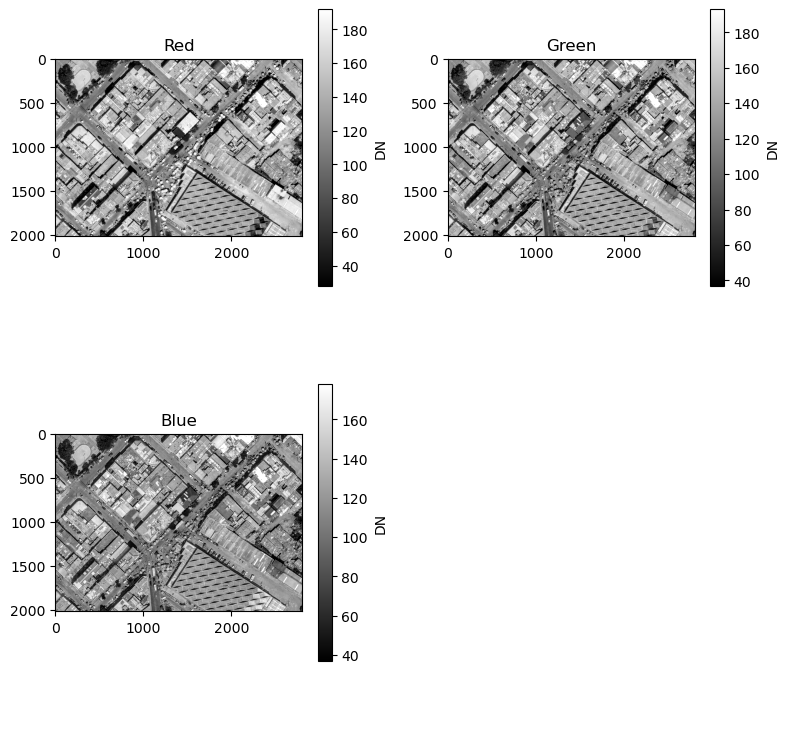

In [11]:
'''
Plot das ibandas da ortoimagem
'''
bandas = ['Red','Green','Blue','NIR']
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

for band in range(1, tunja_tif.count + 1):    # incluye la 4
    data = tunja_tif.read(band)
    # Opción A: rango fijo para 8 bits
    # im = axes[band-1].imshow(data, cmap='gray', vmin=0, vmax=255)

    # Opción B (mejor): auto-escala por percentiles
    p2, p98 = np.percentile(data, (2, 98))
    im = axes[band-1].imshow(data, cmap='gray', vmin=p2, vmax=p98)

    axes[band-1].set_title(bandas[band-1])
    fig.colorbar(im, ax=axes[band-1], label='DN', shrink=0.7)

# Apaga ejes sobrantes si los hubiera
for i in range(tunja_tif.count, len(axes)):
    axes[i].axis('off')

plt.tight_layout(); plt.show()


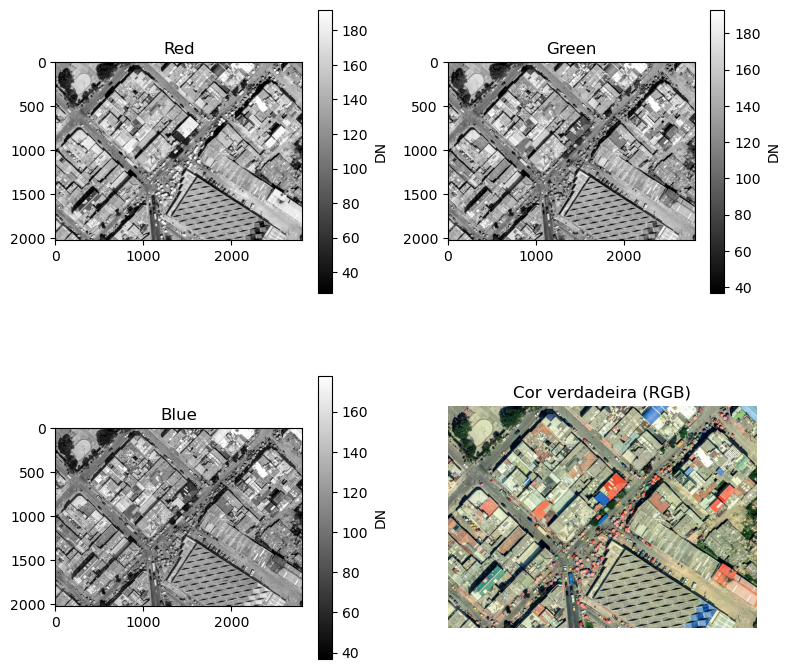

In [16]:
'''
Plot das bandas e da imagem em cor verdadeira
'''

bandas = ['Red','Green','Blue','NIR']
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

for band in range(1, tunja_tif.count + 1):    # incluye la 4
    data = tunja_tif.read(band)
    # Auto-escala por percentiles
    p2, p98 = np.percentile(data, (2, 98))
    im = axes[band-1].imshow(data, cmap='gray', vmin=p2, vmax=p98)

    axes[band-1].set_title(bandas[band-1])
    fig.colorbar(im, ax=axes[band-1], label='DN', shrink=0.7)

# En el último panel mostramos la composición en color verdadero (RGB)
red   = tunja_tif.read(1).astype(float)
green = tunja_tif.read(2).astype(float)
blue  = tunja_tif.read(3).astype(float)

# Normalizamos por percentiles para mejorar contraste
stack = np.dstack([red, green, blue])
p2, p98 = np.percentile(stack, (2, 98))
stack = np.clip((stack - p2) / (p98 - p2), 0, 1)  # escalar 0–1

axes[-1].imshow(stack)
axes[-1].set_title("Cor verdadeira (RGB)")
axes[-1].axis("off")

plt.tight_layout()
plt.savefig('../pesquisa/figuras/bandas_bog.pdf')
plt.show()


# Índices com as imagens planet - Tunja

In [4]:
raster_path = ('../pesquisa/data_raster_final/tunja_planet_recortada_sectores_epsg4326.tif')
tunja_tif = rasterio.open(raster_path)
print(tunja_tif)

<open DatasetReader name='../pesquisa/data_raster_final/tunja_planet_recortada_sectores_epsg4326.tif' mode='r'>


In [5]:
'''
Imprimindo as caracteristicas da imagem
'''

for key, value in tunja_tif.meta.items():
  print(f"{key}: {value}")

driver: GTiff
dtype: uint16
nodata: 0.0
width: 1739
height: 3047
count: 8
crs: EPSG:4326
transform: | 0.00, 0.00,-73.38|
| 0.00,-0.00, 5.58|
| 0.00, 0.00, 1.00|


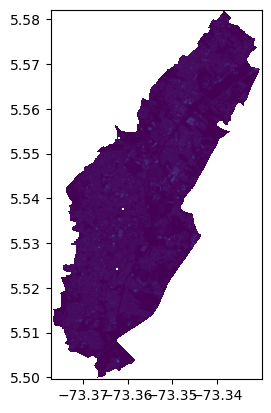

<Axes: >

In [7]:
'''
Plot d aimagem carregada
'''

rasterio.plot.show(tunja_tif)

In [23]:
CB  = tunja_tif.read(1).astype("float32")
B   = tunja_tif.read(2).astype("float32")
G1  = tunja_tif.read(3).astype("float32")
G2  = tunja_tif.read(4).astype("float32")
Y   = tunja_tif.read(5).astype("float32")
R   = tunja_tif.read(6).astype("float32")
RE  = tunja_tif.read(7).astype("float32")
NIR = tunja_tif.read(8).astype("float32")

# Evitar divisiones por cero
eps = 1e-6

In [24]:
'''
Gerando o índice
'''

dbi  = ((R + Y) - (NIR + G2)) / ((R + Y) + (NIR + G2) + eps)
dbi = DBI.clip(-1,1)
dbi[dbi == 0] = np.nan

Text(0.5, 0, 'Column #')

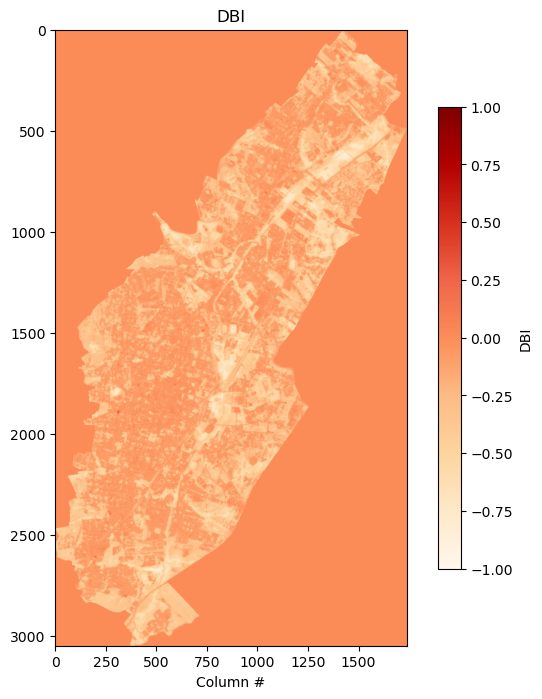

In [25]:
'''
Plot da imagem com o indice
'''

plt.figure(figsize = (8,8))
plt.imshow(DBI, cmap = 'OrRd', vmin = -1, vmax = 1)
plt.colorbar(label = 'DBI', shrink = 0.75)
plt.title('DBI')
plt.xlabel('Column #')

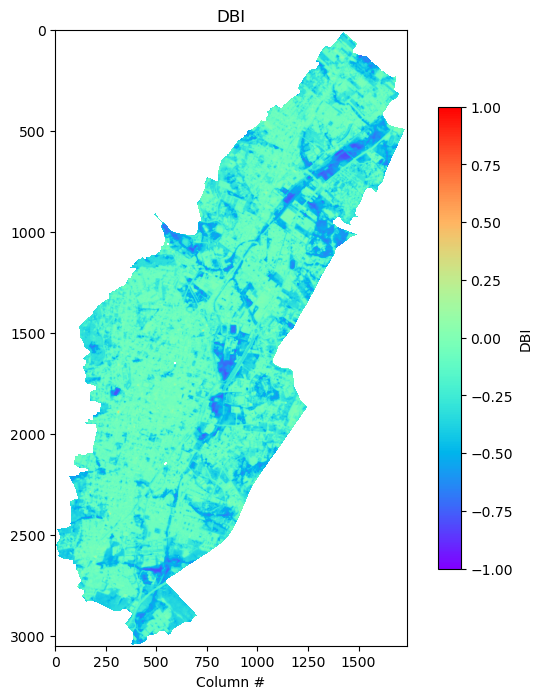

In [50]:
cmap = matplotlib.colormaps.get_cmap("rainbow").copy()
cmap.set_bad(color="white", alpha=0)  # fondo transparente


plt.figure(figsize=(8,8))
plt.imshow(dbi, cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(label="DBI", shrink=0.75)
plt.title("DBI")
plt.xlabel("Column #")
plt.show()

In [58]:
gdf_tunja = gpd.read_file('../pesquisa/data_vectorial_final/tunja_sectores_urbano_epsg4326.gpkg')
gdf_tunja

id     sector          area       areas zonificaci  \
0   7   Sector 7  1.817731e+06  181.773061       None   
1   6   Sector 6  2.443244e+06  244.324388       None   
2   5   Sector 5  1.631310e+06  163.131022       None   
3   2   Sector 2  2.002111e+06  200.211139       None   
4   8   Sector 8  2.346532e+06  234.653180       None   
5   4   Sector 4  2.257559e+00  225.755931       None   
6   3   Sector 3  1.571117e+06  157.111651       None   
7   1   Sector 1  2.132954e+06  213.295435       None   
8  10  Sector 10  1.167756e+06  116.775587       None   
9   9   Sector 9  3.507122e+06  350.712193       None   

                                            geometry  
0  MULTIPOLYGON (((-73.34773 5.56233, -73.34796 5...  
1  MULTIPOLYGON (((-73.36162 5.55251, -73.36143 5...  
2  MULTIPOLYGON (((-73.35592 5.5378, -73.35561 5....  
3  MULTIPOLYGON (((-73.37186 5.53433, -73.37179 5...  
4  MULTIPOLYGON (((-73.35467 5.53373, -73.35465 5...  
5  MULTIPOLYGON (((-73.34945 5.54108, -73.34922 5...  
6  MULTIPOLYGON (((-73.35373 5.51446, -73.3538 5....  
7  MULTIPOLYGON (((-73.3656 5.51935, -73.36517 5....  
8  MULTIPOLYGON (((-73.35424 5.56558, -73.35346 5...  
9  MULTIPOLYGON (((-73.33658 5.57904, -73.33587 5...

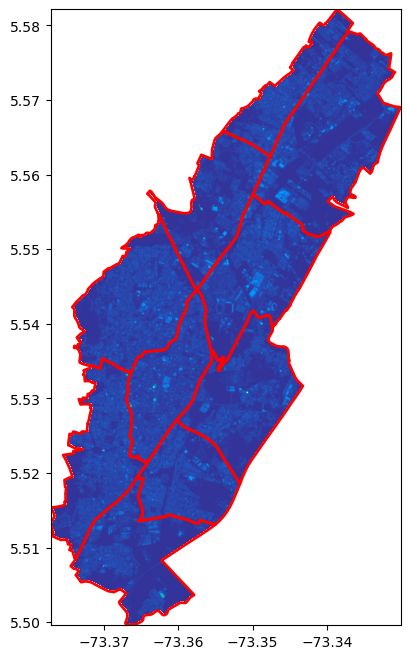

In [61]:
fig, ax = plt.subplots(figsize = (8,8))
rasterio.plot.show(tunja_tif, cmap = 'terrain', ax = ax)
gdf_tunja.plot(ax = ax, edgecolor = 'red', facecolor = 'none', linewidth = 2)
plt.show()

Guardado en ../pesquisa/data_vectorial_final/dbi.tif con CRS: EPSG:4326


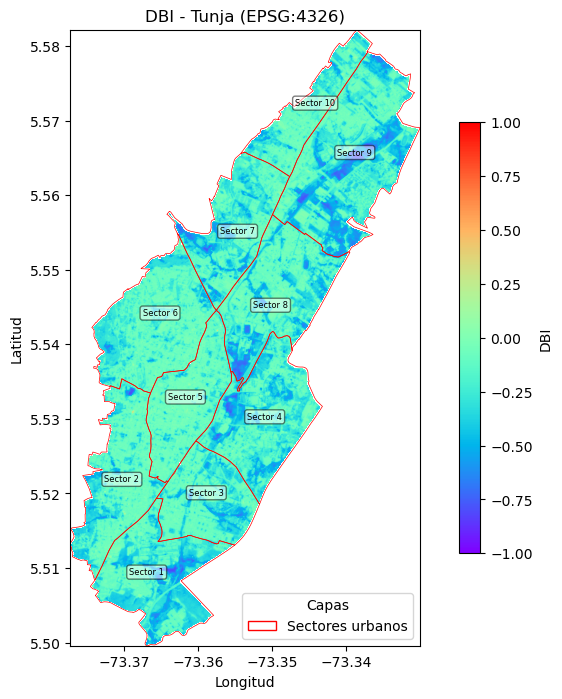

In [68]:
'''
Plot da imagem com a camada vector dos setores da cidadde de Tunja
'''


# === Abrir raster original ===
with rasterio.open("../pesquisa/data_raster_final/tunja_planet_recortada_sectores_epsg4326.tif") as src:
    nodata = src.nodata
    profile = src.profile.copy()
    transform = src.transform
    crs = src.crs

    # Leer bandas
    CB  = src.read(1).astype("float32")
    B   = src.read(2).astype("float32")
    G1  = src.read(3).astype("float32")
    G2  = src.read(4).astype("float32")
    Y   = src.read(5).astype("float32")
    R   = src.read(6).astype("float32")
    RE  = src.read(7).astype("float32")
    NIR = src.read(8).astype("float32")

# === Calcular DBI ===
eps = 1e-6
dbi = ((R + Y) - (NIR + G2)) / ((R + Y) + (NIR + G2) + eps)
dbi = np.clip(dbi, -1, 1)

# Asignar nodata
if nodata is not None:
    mask = (R == nodata) | (Y == nodata) | (NIR == nodata) | (G2 == nodata)
    dbi[mask] = np.nan

# === Preparar perfil para exportar ===
out_profile = profile.copy()
out_profile.update(
    dtype="float32",
    count=1,
    nodata=np.nan
)

# === Exportar GeoTIFF con CRS EPSG:4326 ===
out_path = "../pesquisa/data_vectorial_final/dbi.tif"
with rasterio.open(out_path, "w", **out_profile) as dst:
    dst.write(dbi, 1)

print(f"Guardado en {out_path} con CRS:", crs)

# === Visualización con geopandas ===
gdf_tunja = gpd.read_file("../pesquisa/data_vectorial_final/tunja_sectores_urbano_epsg4326.gpkg")

fig, ax = plt.subplots(figsize=(10, 8))

# Mostrar ráster DBI
im = show(dbi, transform=transform, ax=ax, cmap="rainbow", vmin=-1, vmax=1)

# Superponer vector
gdf_tunja.plot(ax=ax, edgecolor="red", facecolor="none", linewidth=0.5)

# === Labels con el atributo 'sector' ===
for x, y, label in zip(gdf_tunja.geometry.representative_point().x,
                       gdf_tunja.geometry.representative_point().y,
                       gdf_tunja["sector"]):
    ax.text(x, y, label, fontsize=6, ha="center", va="center",
            bbox=dict(facecolor="white", alpha=0.5, boxstyle="round"))

# === Barra de color para el DBI ===
cbar = fig.colorbar(im.get_images()[0], ax=ax, shrink=0.7)
cbar.set_label("DBI")

# === Leyenda manual para sectores urbanos ===
sector_patch = mpatches.Patch(edgecolor="red", facecolor="none", label="Sectores urbanos")
ax.legend(handles=[sector_patch], loc="lower right", title="Capas")

# === Ajustes ===
plt.title("DBI - Tunja (EPSG:4326)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

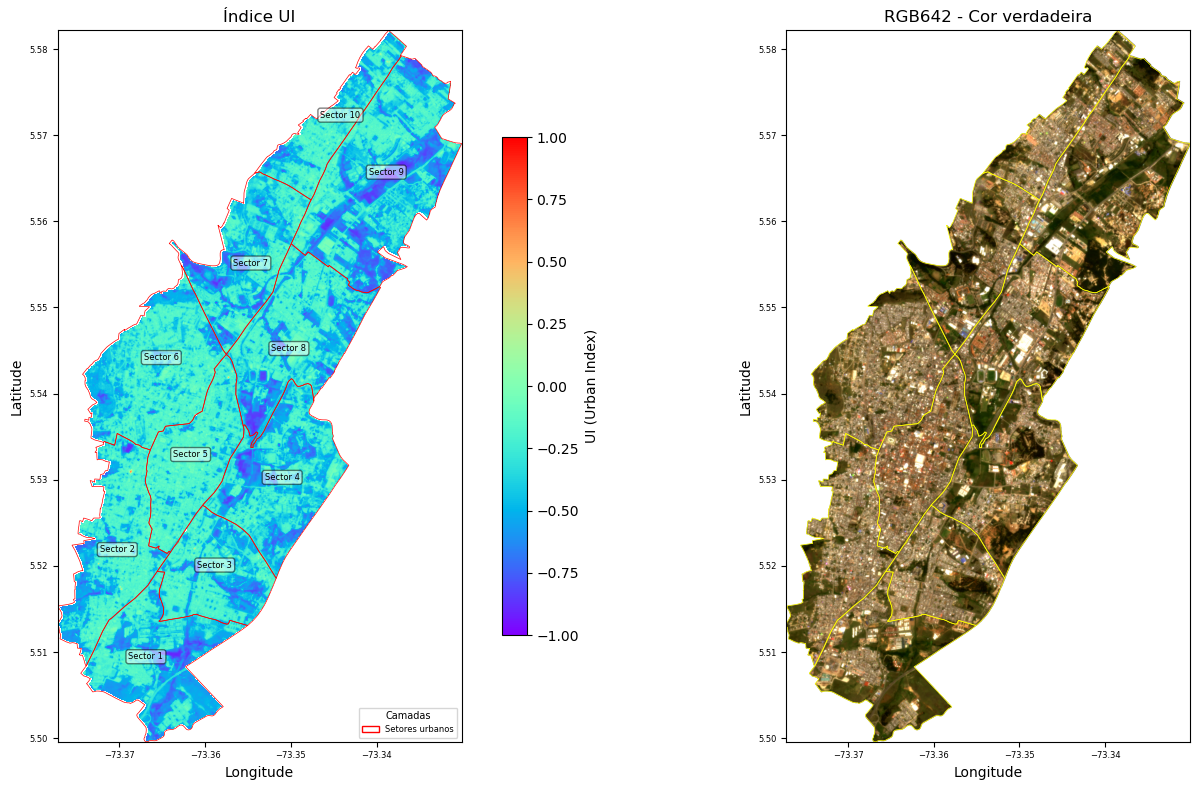

In [102]:
# === 1. Abrir raster original ===
with rasterio.open("../pesquisa/data_raster_final/tunja_planet_recortada_sectores_epsg4326.tif") as src:
    nodata = src.nodata
    profile = src.profile.copy()
    transform = src.transform
    crs = src.crs

    # Leer bandas
    B   = src.read(2).astype("float32")
    G2  = src.read(4).astype("float32")
    R   = src.read(6).astype("float32")
    NIR = src.read(8).astype("float32")

# === 2. Calcular UI ===
eps = 1e-6
ui = (R - NIR) / (R + NIR + eps)
ui = np.clip(ui, -1, 1)

if nodata is not None:
    mask = (R == nodata) | (NIR == nodata)
    ui[mask] = np.nan

# === 3. Visualización ===
gdf_bogota = gpd.read_file("../pesquisa/data_vectorial_final/tunja_sectores_urbano_epsg4326.gpkg")

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# --- Panel 1: índice UI ---
im1 = show(ui, transform=transform, ax=axes[0], cmap="rainbow", vmin=-1, vmax=1)
gdf_bogota.plot(ax=axes[0], edgecolor="red", facecolor="none", linewidth=0.5)
for x, y, label in zip(gdf_bogota.geometry.representative_point().x,
                       gdf_bogota.geometry.representative_point().y,
                       gdf_bogota["sector"]):
    axes[0].text(x, y, label, fontsize=6, ha="center", va="center",
                 bbox=dict(facecolor="white", alpha=0.5, boxstyle="round"))
cbar1 = fig.colorbar(im1.get_images()[0], ax=axes[0], shrink=0.7)
cbar1.set_label("UI (Urban Index)")
sector_patch = mpatches.Patch(edgecolor="red", facecolor="none", label="Setores urbanos")
axes[0].legend(handles=[sector_patch], loc="lower right", title="Camadas", fontsize = 6, title_fontsize = 7)
axes[0].set_title("Índice UI")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
axes[0].tick_params(axis="both", which="major", labelsize=6)

# --- Panel 2: RGB verdadero color con stretch ---
# Crear máscara de nodata a partir de cualquiera de las bandas
if nodata is not None:
    mask_rgb = (R == nodata) | (G2 == nodata) | (B == nodata)
else:
    mask_rgb = np.zeros(R.shape, dtype=bool)

# Reorganizar a (rows, cols, 3)
rgb = np.transpose(np.array([R, G2, B]), (1, 2, 0))

# Stretch 2–98 %
p2, p98 = np.percentile(rgb[~mask_rgb], (2, 98))  # excluir nodata
rgb_stretch = (rgb - p2) / (p98 - p2)
rgb_stretch = np.clip(rgb_stretch, 0, 1)

# Convertir a RGBA con alpha transparente en nodata
rgba = np.zeros((rgb.shape[0], rgb.shape[1], 4), dtype=np.float32)
rgba[..., :3] = rgb_stretch
rgba[..., 3] = np.where(mask_rgb, 0, 1)

# Mostrar con coordenadas geográficas
extent = rasterio.transform.array_bounds(rgb.shape[0], rgb.shape[1], transform)
axes[1].imshow(rgba, extent=[extent[0], extent[2], extent[1], extent[3]], origin="upper")
gdf_bogota.plot(ax=axes[1], edgecolor="yellow", facecolor="none", linewidth=0.5)
axes[1].set_title("RGB642 - Cor verdadeira")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")
axes[1].tick_params(axis="both", which="major", labelsize=6)

plt.tight_layout()
plt.savefig('../pesquisa/figuras/tunja_indice_ui.pdf', format="pdf", dpi=300, bbox_inches="tight")
plt.show()

# Índices com as imagens planet - Bogotá

In [36]:
with rasterio.open("../pesquisa/data_raster_final/bogota_planet_8bandas_recortada_sectores_epsg4326.tif") as src:
    nodata = src.nodata
    profile = src.profile
    CB  = src.read(1).astype("float32")
    B   = src.read(2).astype("float32")
    G1  = src.read(3).astype("float32")
    G2  = src.read(4).astype("float32")
    Y   = src.read(5).astype("float32")
    R   = src.read(6).astype("float32")
    RE  = src.read(7).astype("float32")
    NIR = src.read(8).astype("float32")

eps = 1e-6

dbi = ((R + Y) - (NIR + G2)) / ((R + Y) + (NIR + G2) + eps)

# Clip y asignar nodata a NaN
dbi = np.clip(dbi, -1, 1)
if nodata is not None:
    mask = (R == nodata) | (Y == nodata) | (NIR == nodata) | (G2 == nodata)
    dbi[mask] = np.nan

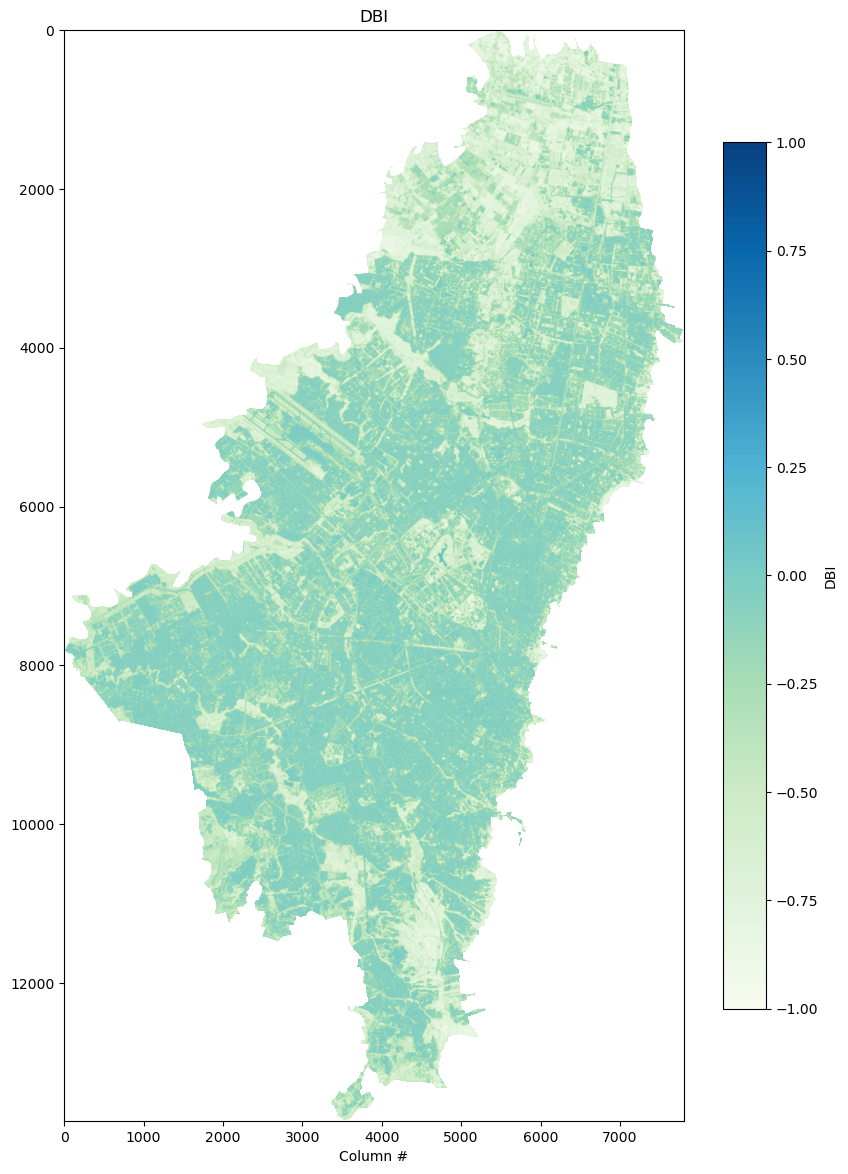

In [48]:
cmap = matplotlib.colormaps.get_cmap("GnBu").copy()
cmap.set_bad(color="white", alpha=0)  # fondo transparente

plt.figure(figsize=(10,15))
plt.imshow(dbi, cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(label="DBI", shrink=0.75)
plt.title("DBI")
plt.xlabel("Column #")
plt.savefig("../pesquisa/figuras/bogota_dbi.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()

Guardado en ../pesquisa/data_vectorial_final/ui.tif con CRS: EPSG:4326


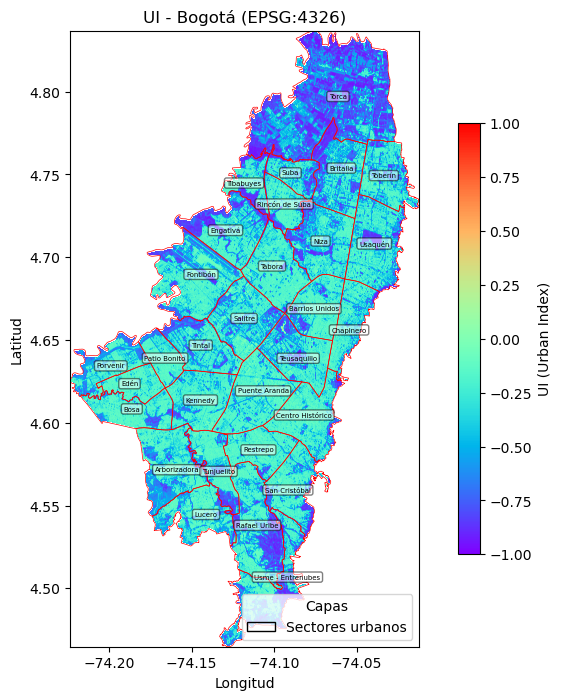

In [73]:
# === 1. Abrir raster original ===
with rasterio.open("../pesquisa/data_raster_final/bogota_planet_8bandas_recortada_sectores_epsg4326.tif") as src:
    nodata = src.nodata
    profile = src.profile.copy()
    transform = src.transform
    crs = src.crs

    # Leer bandas (PlanetScope 8 bandas)
    CB  = src.read(1).astype("float32")
    B   = src.read(2).astype("float32")
    G1  = src.read(3).astype("float32")
    G2  = src.read(4).astype("float32")
    Y   = src.read(5).astype("float32")
    R   = src.read(6).astype("float32")
    RE  = src.read(7).astype("float32")
    NIR = src.read(8).astype("float32")

# === 2. Calcular UI ===
eps = 1e-6
ui = (R - NIR) / (R + NIR + eps)
ui = np.clip(ui, -1, 1)

# Asignar nodata
if nodata is not None:
    mask = (R == nodata) | (NIR == nodata)
    ui[mask] = np.nan

# === 3. Preparar perfil para exportar ===
out_profile = profile.copy()
out_profile.update(
    dtype="float32",
    count=1,
    nodata=np.nan
)

# === 4. Exportar GeoTIFF con CRS EPSG:4326 ===
out_path = "../pesquisa/data_vectorial_final/ui.tif"
with rasterio.open(out_path, "w", **out_profile) as dst:
    dst.write(ui, 1)

print(f"Guardado en {out_path} con CRS:", crs)

# === 5. Visualización con geopandas ===
gdf_bogota = gpd.read_file("../pesquisa/data_vectorial_final/bogota_upl_urbano_epsg4326.gpkg")

fig, ax = plt.subplots(figsize=(10, 8))

# Mostrar ráster UI
im = show(ui, transform=transform, ax=ax, cmap="rainbow", vmin=-1, vmax=1)

# Superponer vector
gdf_bogota.plot(ax=ax, edgecolor="red", facecolor="none", linewidth=0.5)

# === Labels con el atributo 'Nombre' ===
for x, y, label in zip(gdf_bogota.geometry.representative_point().x,
                       gdf_bogota.geometry.representative_point().y,
                       gdf_bogota["Nombre"]):
    ax.text(x, y, label, fontsize=5, ha="center", va="center",
            bbox=dict(facecolor="white", alpha=0.5, boxstyle="round"))

# === Barra de color para el UI ===
cbar = fig.colorbar(im.get_images()[0], ax=ax, shrink=0.7)
cbar.set_label("UI (Urban Index)")

# === Leyenda manual para sectores urbanos ===
sector_patch = mpatches.Patch(edgecolor="red", facecolor="none", label="Sectores urbanos")
ax.legend(handles=[sector_patch], loc="lower left", title="Capas")

# === Ajustes ===
plt.title("UI - Bogotá (EPSG:4326)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

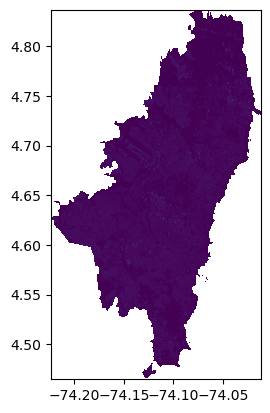

<Axes: >

In [4]:
raster_path = ('../pesquisa/data_raster_final/bogota_planet_8bandas_recortada_sectores_epsg4326.tif')
bogo_tif = rasterio.open(raster_path)
rasterio.plot.show(bogo_tif)

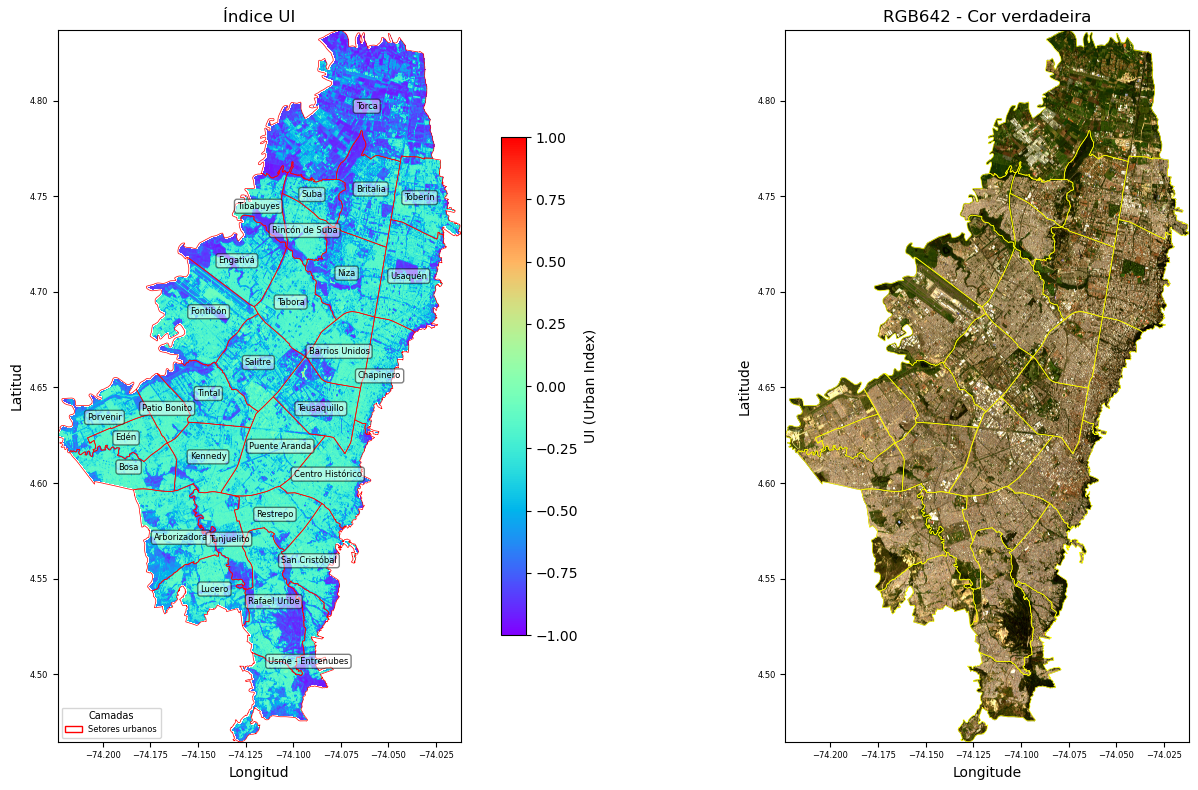

In [104]:
# === 1. Abrir raster original ===
with rasterio.open("../pesquisa/data_raster_final/bogota_planet_8bandas_recortada_sectores_epsg4326.tif") as src:
    nodata = src.nodata
    profile = src.profile.copy()
    transform = src.transform
    crs = src.crs

    # Leer bandas
    B   = src.read(2).astype("float32")
    G2  = src.read(4).astype("float32")
    R   = src.read(6).astype("float32")
    NIR = src.read(8).astype("float32")

# === 2. Calcular UI ===
eps = 1e-6
ui = (R - NIR) / (R + NIR + eps)
ui = np.clip(ui, -1, 1)

if nodata is not None:
    mask = (R == nodata) | (NIR == nodata)
    ui[mask] = np.nan

# === 3. Visualización ===
gdf_bogota = gpd.read_file("../pesquisa/data_vectorial_final/bogota_upl_urbano_epsg4326.gpkg")

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# --- Panel 1: índice UI ---
im1 = show(ui, transform=transform, ax=axes[0], cmap="rainbow", vmin=-1, vmax=1)
gdf_bogota.plot(ax=axes[0], edgecolor="red", facecolor="none", linewidth=0.5)
for x, y, label in zip(gdf_bogota.geometry.representative_point().x,
                       gdf_bogota.geometry.representative_point().y,
                       gdf_bogota["Nombre"]):
    axes[0].text(x, y, label, fontsize=6, ha="center", va="center",
                 bbox=dict(facecolor="white", alpha=0.5, boxstyle="round"))
cbar1 = fig.colorbar(im1.get_images()[0], ax=axes[0], shrink=0.7)
cbar1.set_label("UI (Urban Index)")
sector_patch = mpatches.Patch(edgecolor="red", facecolor="none", label="Setores urbanos")
axes[0].legend(handles=[sector_patch], loc="lower left", title="Camadas", title_fontsize = 7, fontsize = 6)
axes[0].set_title("Índice UI")
axes[0].set_xlabel("Longitud")
axes[0].set_ylabel("Latitud")
axes[0].tick_params(axis="both", which="major", labelsize=6)

# --- Panel 2: RGB verdadero color con stretch ---
# Crear máscara de nodata a partir de cualquiera de las bandas
if nodata is not None:
    mask_rgb = (R == nodata) | (G2 == nodata) | (B == nodata)
else:
    mask_rgb = np.zeros(R.shape, dtype=bool)

# Reorganizar a (rows, cols, 3)
rgb = np.transpose(np.array([R, G2, B]), (1, 2, 0))

# Stretch 2–98 %
p2, p98 = np.percentile(rgb[~mask_rgb], (2, 98))  # excluir nodata
rgb_stretch = (rgb - p2) / (p98 - p2)
rgb_stretch = np.clip(rgb_stretch, 0, 1)

# Convertir a RGBA con alpha transparente en nodata
rgba = np.zeros((rgb.shape[0], rgb.shape[1], 4), dtype=np.float32)
rgba[..., :3] = rgb_stretch
rgba[..., 3] = np.where(mask_rgb, 0, 1)

# Mostrar con coordenadas geográficas
extent = rasterio.transform.array_bounds(rgb.shape[0], rgb.shape[1], transform)
axes[1].imshow(rgba, extent=[extent[0], extent[2], extent[1], extent[3]], origin="upper")
gdf_bogota.plot(ax=axes[1], edgecolor="yellow", facecolor="none", linewidth=0.5)
axes[1].set_title("RGB642 - Cor verdadeira")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")
axes[1].tick_params(axis="both", which="major", labelsize=6)

plt.tight_layout()
plt.savefig('../pesquisa/figuras/bogota_indice_ui.pdf', format="pdf", dpi=300, bbox_inches="tight")
plt.savefig('../pesquisa/figuras/bogota_indice_ui.svg', format="svg", dpi=300, bbox_inches="tight")
plt.show()